# Linear Regresion Uni-variable Predictive Model

### About

This is a project for the PostGrad class of Data Science in python.

We will use a dataset to predict with uni variables, 

### 1. Crear un entorno de anaconda con los paquetes que considere necesarios / Create an anaconda environment with the needed packages.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
# se carga el dataset
data = np.load('proyecto_data/proyecto_training_data.npy')
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [16]:
data.shape

(1460, 6)

tiene 1460 filas y 6 columnas, no tienen título pero estas son: 

### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %). / Using slicing with NumPy separate the data into 2 datasets training 80% and testing 20%  

In [29]:
# nombre de las colúmnas
keys = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

In [30]:
# se le dan los indices al arreglo de data para que hagan match con los indices de keys.
data = data[:, [keys.index(key) for key in keys]]
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [31]:
#convertimos a dataframe
df = pd.DataFrame(data, columns=keys)
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


#### funciones de prueba pandas

In [41]:
def Slicing_python_pd(dataset : pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    # test to 0.8
    trows = dataset.shape[0]
    train= round(trows*0.8)
    
    
    df_train = dataset.sample(n = train)
    df_test = dataset[~dataset.index.isin(df_train.index)]
    
    return df_train, df_test

In [42]:
df_train, df_test = Slicing_python_pd(df)
df_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
494,91300.0,5.0,886.0,4.0,1938.0,50.0
948,192500.0,7.0,936.0,7.0,2002.0,65.0
1451,287090.0,8.0,1578.0,7.0,2008.0,78.0
988,195000.0,6.0,1118.0,8.0,1976.0,NaN
606,152000.0,5.0,1040.0,6.0,1996.0,82.0
...,...,...,...,...,...,...
721,143000.0,6.0,848.0,3.0,2004.0,NaN
1208,140000.0,5.0,1283.0,6.0,1962.0,70.0
96,214000.0,7.0,1588.0,6.0,1999.0,78.0
298,175000.0,6.0,1041.0,7.0,1968.0,90.0


In [43]:
df_test

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
11,345000.0,9.0,1182.0,11.0,2005.0,85.0
...,...,...,...,...,...,...
1432,64500.0,4.0,968.0,5.0,1927.0,60.0
1433,186500.0,6.0,962.0,8.0,2000.0,93.0
1444,179600.0,7.0,1422.0,7.0,2004.0,63.0
1448,112000.0,4.0,796.0,6.0,1910.0,70.0


#### slicing con numpy

In [47]:
def Slicing_python_np(dataset : pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    # test to 0.8
    trows = dataset.shape[0]
    train= round(trows*0.8)
    
    #volvero un arreglo de np para poder usar shuffle
    np_dataset = dataset.to_numpy()
    
    # poder replicar resultados.
    np.random.seed(42)
    np.random.shuffle(np_dataset)
    
    df_final = pd.DataFrame(np_dataset, columns = dataset.columns)
    
    df_train = df_final[:train]
    df_test = df_final[train:]
    
    
    return df_train, df_test

In [48]:
df_train, df_test = Slicing_python_np(df)
df_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,154500.0,6.0,1068.0,6.0,1963.0,70.0
1,325000.0,8.0,1500.0,9.0,1994.0,98.0
2,115000.0,5.0,1028.0,5.0,1927.0,56.0
3,159000.0,6.0,1004.0,7.0,1947.0,50.0
4,315500.0,9.0,1620.0,6.0,2007.0,89.0
...,...,...,...,...,...,...
1163,135000.0,5.0,893.0,4.0,1949.0,60.0
1164,208900.0,6.0,1493.0,7.0,1997.0,75.0
1165,269500.0,8.0,774.0,8.0,2009.0,92.0
1166,149000.0,6.0,1004.0,5.0,1970.0,NaN


In [49]:
df_test

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1168,210000.0,6.0,915.0,6.0,1923.0,70.0
1169,97500.0,6.0,912.0,6.0,1948.0,78.0
1170,165000.0,6.0,1224.0,5.0,1999.0,NaN
1171,213490.0,7.0,1506.0,6.0,2005.0,43.0
1172,137900.0,5.0,2136.0,7.0,1951.0,89.0
...,...,...,...,...,...,...
1455,176432.0,6.0,1314.0,6.0,2006.0,78.0
1456,135000.0,4.0,1328.0,7.0,1928.0,65.0
1457,115000.0,5.0,864.0,5.0,1955.0,60.0
1458,189950.0,7.0,912.0,7.0,1918.0,55.0


#### este codigo se usara para el entrenamiento, pero se implementó un algoritmo para la parte 2 de slicing.

In [22]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en un 80% para train y 20% para test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
train_df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
254,145000.0,5.0,1314.0,5.0,1957.0,70.0
1066,178000.0,6.0,799.0,7.0,1993.0,59.0
638,85000.0,5.0,796.0,4.0,1910.0,67.0
799,175000.0,5.0,981.0,7.0,1937.0,60.0
380,127000.0,5.0,1026.0,6.0,1924.0,50.0
...,...,...,...,...,...,...
1095,176432.0,6.0,1314.0,6.0,2006.0,78.0
1130,135000.0,4.0,1328.0,7.0,1928.0,65.0
1294,115000.0,5.0,864.0,5.0,1955.0,60.0
860,189950.0,7.0,912.0,7.0,1918.0,55.0


In [24]:
test_df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
892,154500.0,6.0,1068.0,6.0,1963.0,70.0
1105,325000.0,8.0,1500.0,9.0,1994.0,98.0
413,115000.0,5.0,1028.0,5.0,1927.0,56.0
522,159000.0,6.0,1004.0,7.0,1947.0,50.0
1036,315500.0,9.0,1620.0,6.0,2007.0,89.0
...,...,...,...,...,...,...
479,89471.0,4.0,1131.0,7.0,1937.0,50.0
1361,260000.0,7.0,1530.0,7.0,2005.0,124.0
802,189000.0,7.0,728.0,7.0,2005.0,63.0
651,108000.0,4.0,755.0,7.0,1940.0,60.0


In [27]:
# filas para el 80%
1460*0.8

1168.0

In [28]:
# filas para el 20%
1460*0.2

292.0

### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas) / Exploratory analisys of the data: for each variable in the dataset calculate using numpy or pandas

In [76]:
def Analisis_exploratorio_variables(dataframe: pd.DataFrame):

    for key in df.columns:
            df2 = df[key].describe()
            print("\n", key, ":")
            print("La media es: ", df2['mean'])
            print("El valor minimo es: ", df2['min'])
            print("El valor máximo es: ", df2['max'])
            print("El rango es: ", df2['max']- df2['min'])
            print("La desviación estandar es de: ", df2['std'])
        

In [77]:
# Código sacado de la lección 5 para clasificar las columnas:
# Code used in lection 5 to clasify columns to continuous, categoricals or discrete variables.
def getVariablesScaleType(dataset):
    columnas = dataset.columns
    categoricas = []
    continuas = []
    discretas = []

    for col in columnas:
        col_type = dataset[col].dtype
        n = len(dataset[col].unique())

        if(col_type == 'object'):
            categoricas.append(col)
        elif(col_type == 'int64' or col_type == 'float' or col_type == 'int'):
            if(n <= 30):
                discretas.append(col)
            else:
                continuas.append(col)
    
    return continuas, discretas, categoricas

In [78]:
var_con, var_disc, var_cat = getVariablesScaleType(df)

In [79]:
print("Las siguientes variables son continuas: ", var_con)
print("Las siguientes variables son discretas: ", var_disc)
print("Las siguientes variables son categoricas: ", var_cat)

Las siguientes variables son continuas:  ['SalePrice', '1stFlrSF', 'YearBuilt', 'LotFrontage']
Las siguientes variables son discretas:  ['OverallQual', 'TotRmsAbvGrd']
Las siguientes variables son categoricas:  []


In [80]:
Analisis_exploratorio_variables(df)


 SalePrice :
La media es:  180921.19589041095
El valor minimo es:  34900.0
El valor máximo es:  755000.0
El rango es:  720100.0
La desviación estandar es de:  79442.50288288659

 OverallQual :
La media es:  6.0993150684931505
El valor minimo es:  1.0
El valor máximo es:  10.0
El rango es:  9.0
La desviación estandar es de:  1.38299654674159

 1stFlrSF :
La media es:  1162.626712328767
El valor minimo es:  334.0
El valor máximo es:  4692.0
El rango es:  4358.0
La desviación estandar es de:  386.5877380410744

 TotRmsAbvGrd :
La media es:  6.517808219178082
El valor minimo es:  2.0
El valor máximo es:  14.0
El rango es:  12.0
La desviación estandar es de:  1.6253932905840636

 YearBuilt :
La media es:  1971.267808219178
El valor minimo es:  1872.0
El valor máximo es:  2010.0
El rango es:  138.0
La desviación estandar es de:  30.20290404252528

 LotFrontage :
La media es:  70.04995836802665
El valor minimo es:  21.0
El valor máximo es:  313.0
El rango es:  292.0
La desviación estandar es

### 4. Para cada variable en el dataset usar seaborn(funci´on distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable. / For each variable in the dataset use seaborn to graph an histogram of the variable.

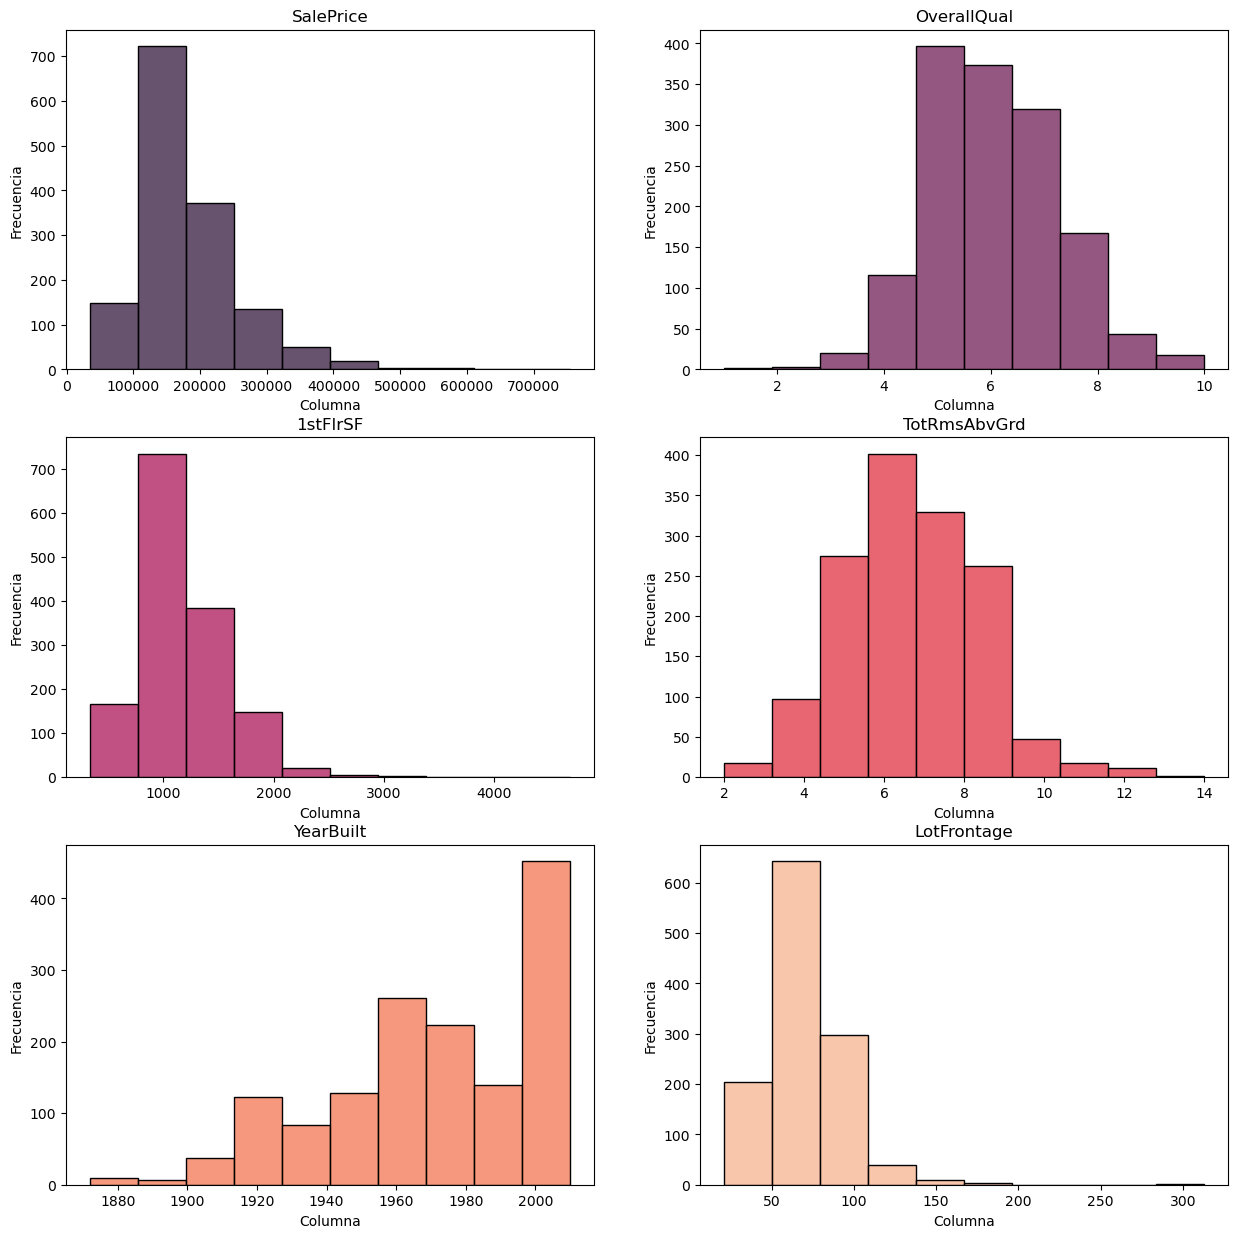

In [108]:
num_subplots_por_fila = 2
num_filas = (len(keys) - 1) // num_subplots_por_fila + 1
num_columnas = num_subplots_por_fila

palette = sns.color_palette("rocket", num_filas * num_columnas)  # Ejemplo: paleta "tab10"
sns.set_palette(palette)

# Crear subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

for i, key in enumerate(df.columns):
    ax = axs[i // num_subplots_por_fila, i % num_subplots_por_fila]
    sns.histplot(df[key], ax=ax, bins=10, color=palette[i], edgecolor='black')
    ax.set_title(key)
    ax.set_xlabel('Columna')
    ax.set_ylabel('Frecuencia')

plt.show()